# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


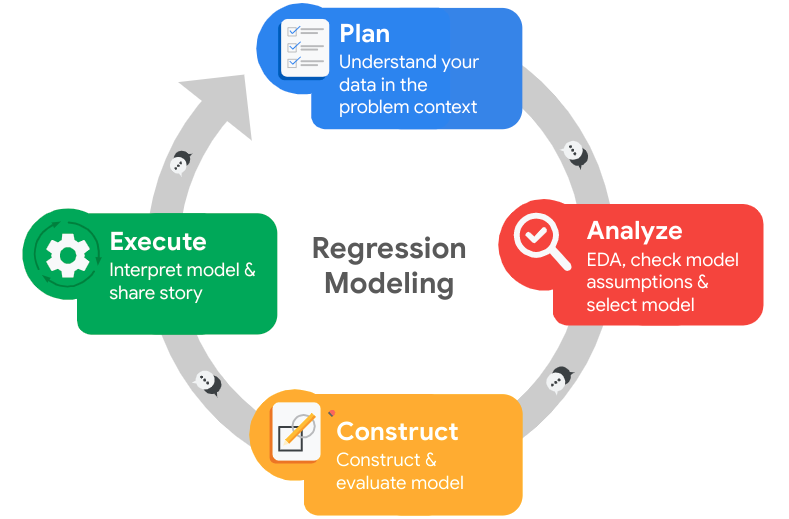

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [3]:
# Import packages
### YOUR CODE HERE ### 
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={'Work_accident':'work_accident', 
                    'promotion_last_5years':'promotion_last_5_years', 
                    'Department':'department', 
                    'time_spend_company': 'tenure', 
                    'average_montly_hours': 'average_monthly_hours'}, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().any(axis=0)

satisfaction_level        False
last_evaluation           False
number_project            False
average_monthly_hours     False
tenure                    False
work_accident             False
left                      False
promotion_last_5_years    False
department                False
salary                    False
dtype: bool

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [11]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

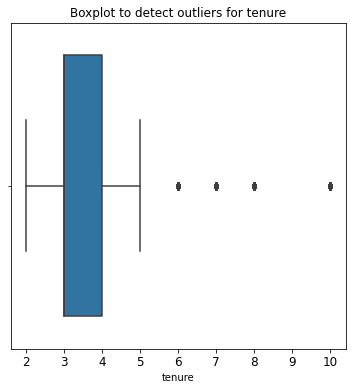

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()


In [14]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# Compute relevante percentiles and the interquartile range
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)
iqr = percentile75 - percentile25

# Define the upper and lower limits for non-outlier values in 'tenure'
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('Lower Limit: ', lower_limit)
print('Upper Limit: ', upper_limit)

# Find the actual limits and then print the number of outliers
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

print('Number of rows in the data containing outliers in `tenure`: ', len(outliers))



Lower Limit:  1.5
Upper Limit:  5.5
Number of rows in the data containing outliers in `tenure`:  824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

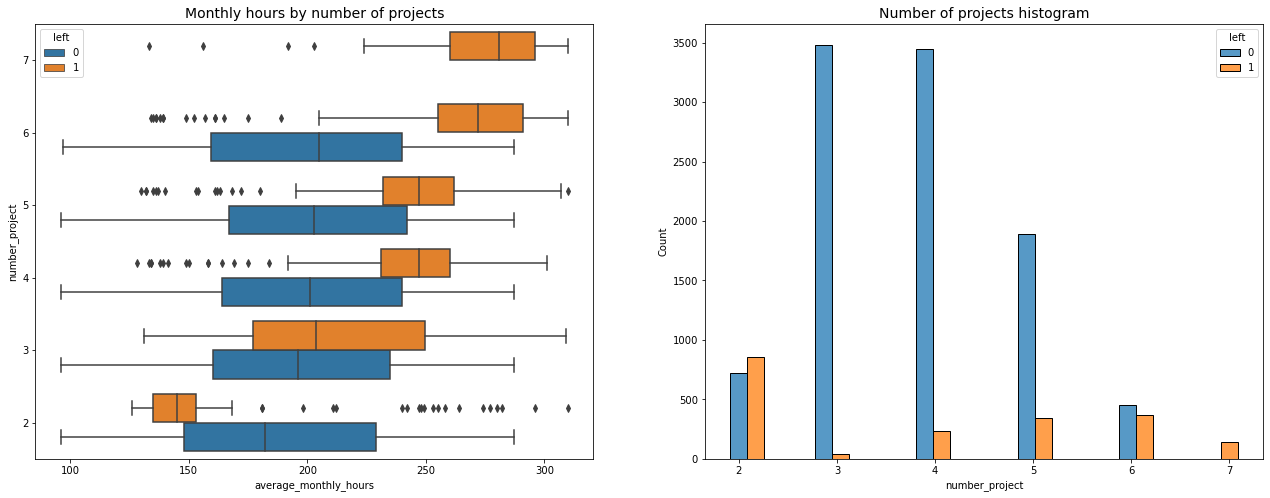

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###

# Set figure and axis variables
fig, ax = plt.subplots(1, 2, figsize=(22,8))

# Create a boxplot showing the distribution of 'average_monthly_hours' by 'number_project', 
# With a focus on number of employees who stayed versus left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create a histogram of distribution in 'number_project', comparing employees who stayed versus left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

It appears there are a few different groups of employees who left, based upon the number of projects they had or how many hours they worked.

First is employees with a few projects but worked fewer hours than many of their coworkers with the same number of projects. These employees may have been fired for not working enough, or were already in the process of leaving the company and therefore weren't given as much work.

The second group is those who either have a lot of projects, or work many more hours than their comparable coworkers. This might reveal something about employees with too much on their plates overworking and getting burnt out, and thereby leaving the company. In fact, it seems every employee who worked 7 projects did end up leaving the company, which we can confirm below.

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###

# Checking if all employees with 7 projects left the company
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

As expected, every employee with 7 projects did end up leaving the company.

Now in order to address the overworking issue, we can chart the employee evaluation score against the monthly hours worked to see if there are lower satisfaction levels with those employees who worked more.

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

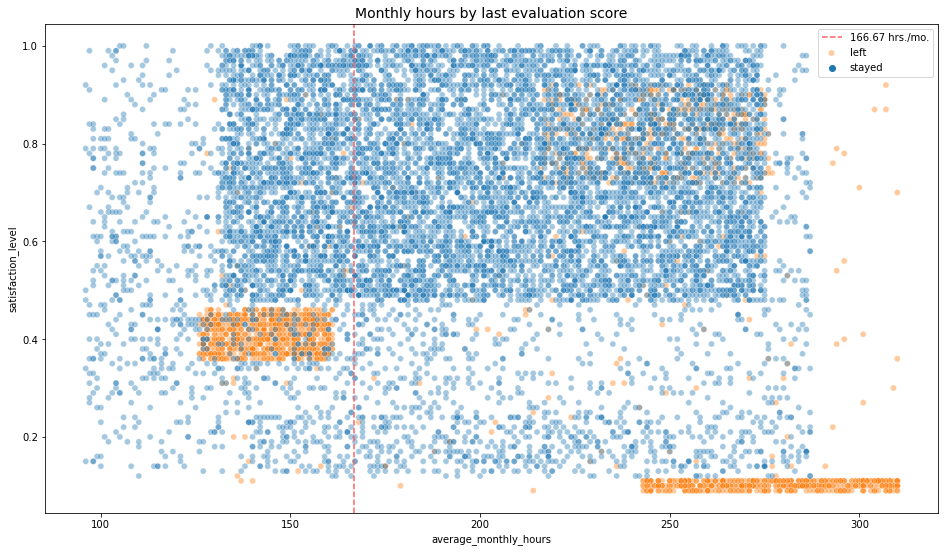

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create a scatterplot of 'average_monthly_hours' versus 'satisfaction_level', coloring in based on whether the employee stayed or left
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14')

As expected again, there is a group of employees who worked ~240+ hours monthly with very low satisfaction levels. It is understandable that those employees then left the company.

The stranger groups are the ones who worked slightly less than an average working month (~166.67 hours per month), and still left. Further, there is a group with high satisfaction and ~250 hours worked per month who decided to leave. These two distributions are also very regularly shaped, which is very strange and probably need to be looked into.

However, keeping with satisfaction levels, let's look into satisfaction by how long the employee has been working there.

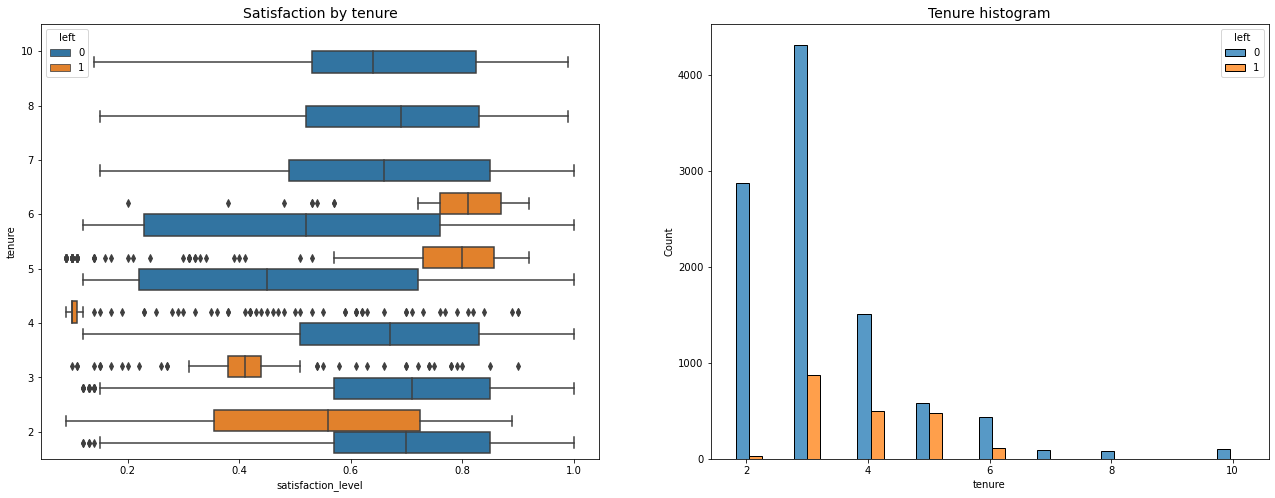

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###

# Set figure and axis variables
fig, ax = plt.subplots(1, 2, figsize=(22,8))

# Create a boxplot showing distribution of 'satisfaction_level' by tenure
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of 'tenure', coloring based on whether the employee left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

# Display the plots
plt.show()

So there are a few groups of employees who left: either they were relatively new and moderately dissatisfied, or have been around for a while and were very satisfied. Further, every employee who left after 4 years seems to have been extremely dissatisfied, which may have something to do with a company policy about that specific demographic. 

There also seem to be very few long-tenured employees, although they are all reasonably satisfied and none of them are leaving.

The next step is to check some statistics about satisfaction ratings based on whether the employee stayed or left.

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###

# Calculate mean and median satisfaction scores of employees who left and those that stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores are lower for those employees who have left the company. 

Now we can examine salary levels for different tenures.

Text(0.5, 1.0, 'Salary Histogram by Tenure: Long-Tenured Employees')

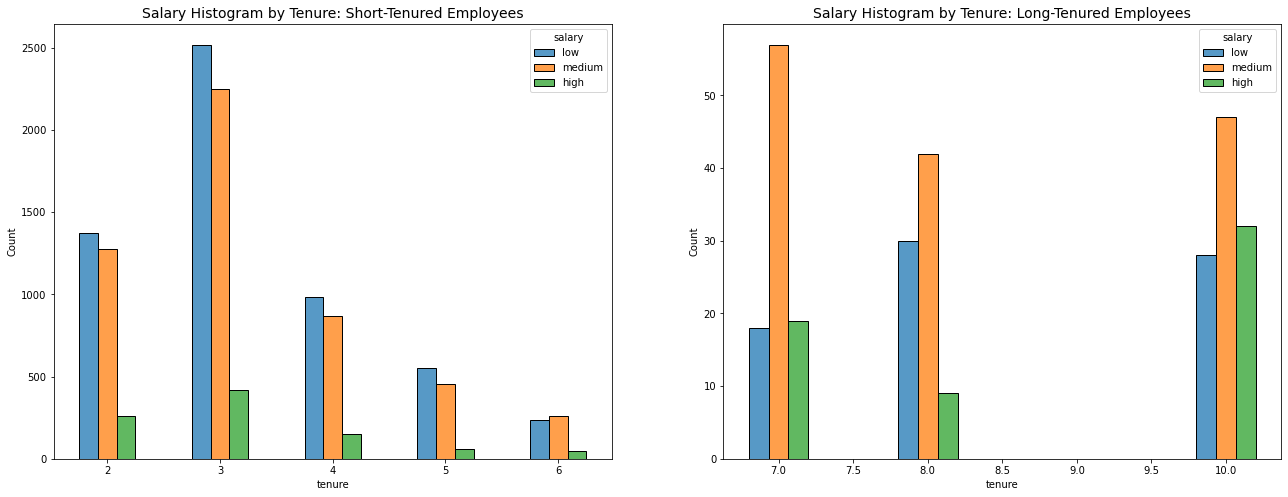

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###

# Set figure and axis variables
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short- and long-tenured employees
tenure_short = df1[df1['tenure'] <7]
tenure_long = df1[df1['tenure'] > 6]

# Plot short- and long-tenured histograms
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1,
            hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.5, ax=ax[0])
ax[0].set_title('Salary Histogram by Tenure: Short-Tenured Employees', fontsize='14')

sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1,
            hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.4, ax=ax[1])
ax[1].set_title('Salary Histogram by Tenure: Long-Tenured Employees', fontsize='14')



So it looks as if the long-term employees aren't comprised entirely of the higher-paid employees. There is a balance between the newer employees and more experienced ones that wouldn't account for the difference in satisfaction levels.

Next, let's compare the number of hours an employee worked versus their evaluation scores, to see if there is a correlation between the overworked employees and how they are percieved.

Text(0.5, 1.0, 'Monthly Hours by Last Evaluation Score')

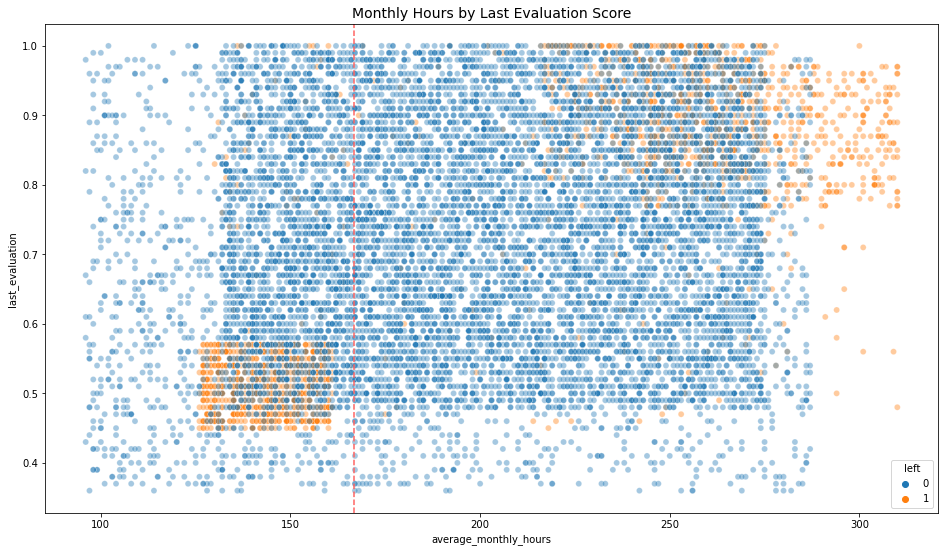

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create a scatterplot of 'average_monthly_hours' versus 'last_evaluation'
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.title('Monthly Hours by Last Evaluation Score', fontsize='14')

Once again, there seems to be two distinct groups of employees who left: One group is overworked employees who scored very highly, and one group who did just under a normal work month and received a low score. 

Now we can look at whether the employees who are working very long hours are being duly compensated, i.e. by being promoted.

Text(0.5, 1.0, 'Monthly Hours by Promotion Last 5 Years')

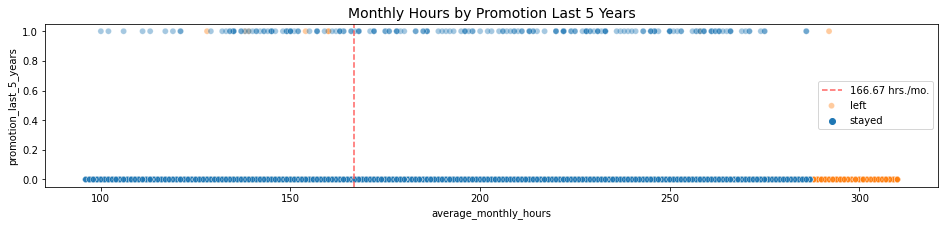

In [23]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create a plot to examine the relationship between 'average_monthly_hours' and 'promotion_last_5_years'
plt.figure(figsize=(16,3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5_years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly Hours by Promotion Last 5 Years', fontsize='14')


So it appears that of those employees working the most hours, very few were promoted and most of them ended up leaving the company. 

We have a lot of information now, but let's just check a correlation heatmap to make sure everything is how we expect.

Text(0.5, 1.0, 'Correlation Heatmap')

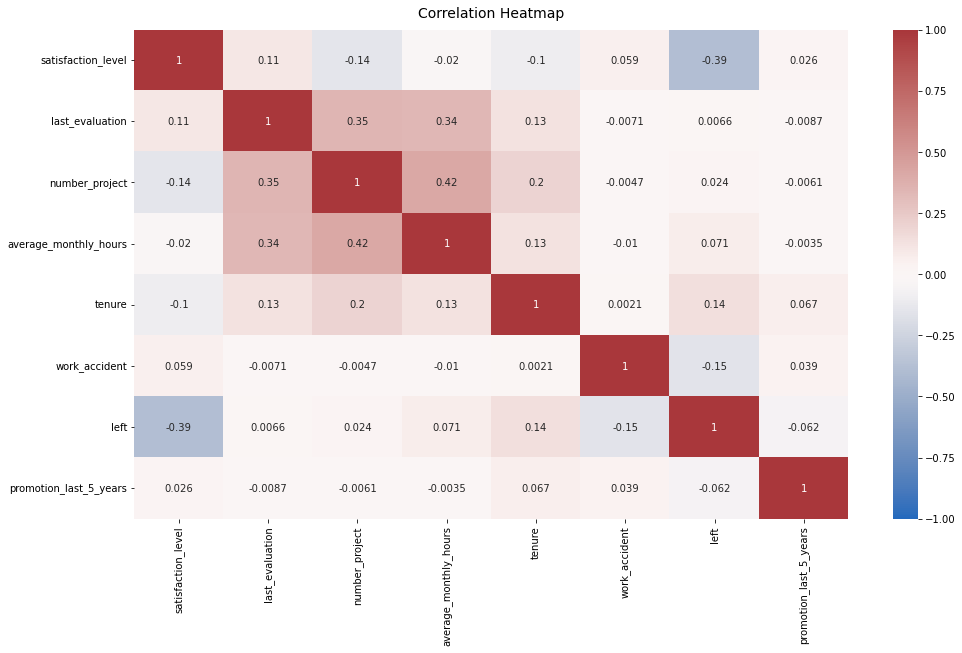

In [24]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Plot a correlation heatmap
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette('vlag', as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)


So it looks like we expected, with some correlation between number of projects, monthly hours, and evalution scores all being related, and a reasonable negative correlation between satisfaction level and if an employee left.

### Insights

Based on all of the data above, it appears there is an issue with how employees are being treated, presumably from the management level. Many employees are working too many hours on too many projects, without receiveing adequate compensation either through promotions or good evaluations. Therefore they are leaving, even after providing dissatisfied responses to management. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal of the prediction task is to determine whether or not an employee will leave the company, which is a categorical classification problem. Either the employee left (an outcome value of 1), or the employee stayed (an outcome value of 0).

### Identify the types of models most appropriate for this task.

Because this is a categorical problem, it is best to use either a Logistic Regression model, or a Tree-based Machine Learning model. We will use both to see how they compare.

### Modeling Approach A: Logistic Regression

Add as many cells as you need to conduct the modeling process.

In [25]:
### YOUR CODE HERE ###

# Copy the dataframe
df_enc = df1.copy()

# Encode the 'salary' column as an ordinal numeric category
df_enc['salary'] = (df_enc['salary'].astype('category')
                   .cat.set_categories(['low', 'medium', 'high'])
                   .cat.codes)

# Dummy encode the 'department' column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


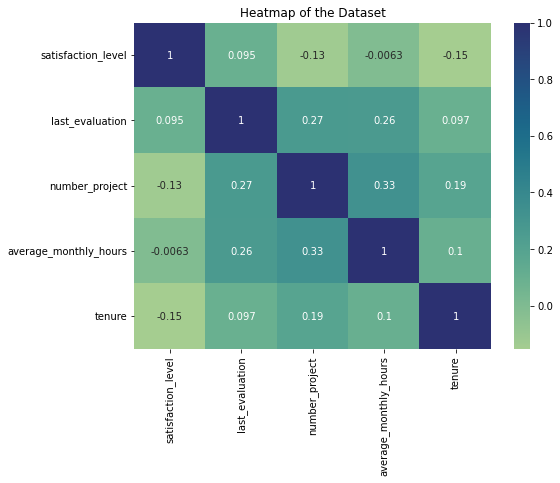

In [26]:
# Create a heatmap to visualize correlation
plt.figure(figsize=(8,6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
           .corr(), annot=True, cmap='crest')
plt.title('Heatmap of the Dataset')
plt.show()



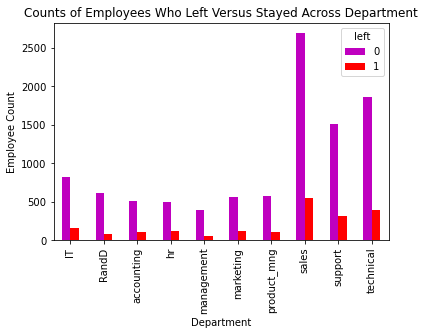

In [27]:
# Create a stacked bar plot to visualize number of employees across departments, comparing those who left with those who didn't
pd.crosstab(df1['department'], df1['left']).plot(kind='bar', color='mr')
plt.title('Counts of Employees Who Left Versus Stayed Across Department')
plt.ylabel('Employee Count')
plt.xlabel('Department')
plt.show()



In [28]:
# Time to remove the outliers from the 'tenure' column that were seen earlier
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [29]:
# Isolate the outcome variable
y = df_logreg['left']

y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [30]:
# Select the features used in the model
X = df_logreg.drop('left', axis=1)

X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5_years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


In [32]:
# Create a logistic regression model and fit to training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [33]:
# Use the model to predict on the test set
y_pred = log_clf.predict(X_test)

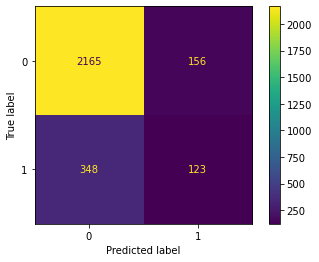

In [34]:
# Create a confusion matrix to visualize the results

# Compute the values for the confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create a display for the matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot the matrix
log_disp.plot(values_format='')

plt.show()

The results don't look too bad:

Upper-Left (True Negatives): Model predicted 'stayed', and employee stayed.

Upper-Right (False Positives): Model predicted 'left', but employee stayed.

Bottom-Left (False Negatives): Model predicted 'stayed', but employee left.

Bottom-Right (True Positives): Model predicted 'left', and employee left.

Now we can create a classification report that breaks this down into some easier metrics. Start by checking the balance of the data in order to properly understand the metrics later.

In [35]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

So the data is skewed, but not too badly. We shouldn't need to rebalance the classes in order to understand the data.

In [36]:
# Create classification report for logistic regression model
target_names = ['Predicted Would Not Leave', 'Predicted Would Leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted Would Not Leave       0.86      0.93      0.90      2321
    Predicted Would Leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



So it appears that overall the model has a precision of 79%, recall of 82%, f1-score of 80%, and accuracy of 82%. This isn't bad overall, but if it was most important to predict whether an employee would leave, the scores are significantly lower. Therefore it appears the model is staying safe and predicting the class with a higher percentage of the dataset (employee staying).

### Modeling Approach B: Tree-Based Model

This covers the approaches of Decision Trees and Random Forests.

In [37]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [38]:
# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5_years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### Decision Tree - Round 1

Constructing a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [40]:
# Instantiate the model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
            }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [42]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.91 s, sys: 99.3 ms, total: 3.01 s
Wall time: 3.01 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [43]:
# Identify the optimal values for the parameters

# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [44]:
# Identify the best AUC score achieved
tree1.best_score_

0.969819392792457

This is a very good AUC score, so the model should do pretty well in predicting employees who will leave.

Now, we can write a function that helps extract all the scores from the grid search.

In [47]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): What you want the model to be called in the output
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
        
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''
    
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }
    
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Isolate the row of the df with the max (metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    # Extract accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })
    
    return table

In [48]:
# Use the function to get all the scores from grid search

# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


All of these scores from the decision tree model are good indicators that the model is working well.

There is some danger that this model is overfitting though, so it's a good idea to construct a random forest model next.

##### Random Forest - Round 1

In [49]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3, 5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [300, 500]
            }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate a GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [50]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 9min 25s, sys: 4.37 s, total: 9min 29s
Wall time: 9min 29s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [55]:
# We can set a path to the folder where we save the model
# This path can be changed later based on where it's saved
path = '/home/jovyan/work/'

In [52]:
# Define functions to pickle the model and read in the model

def write_pickle(path, model_object, save_as:str):
    '''
    In:
        path: path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as (string): filename for the saved file
        
    Out: A call to pickle the model in the folder indicated
    '''
    
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [53]:
def read_pickle(path, saved_model_name:str):
    '''
    In:
        path: path to folder where you want to read from
        saved_model_name (string): filename of pickled model
        
    Out: 
        model: the pickled model
    '''
    
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
        
    return model

Now we can save the above model in a pickle file and then read it in

In [56]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [57]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [58]:
# Check best AUC score on CV
rf1.best_score_

0.9804250949807172

In [59]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [60]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


So it looks like the random forest does slightly better than the decision tree, although it's pretty close. 

Now we can test the final model on the test set.

In [63]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores
    
    In:
        model_name (string): How the model should be named in output
        model: A fit GridSearchCV object
        X_test_data: numpy array of X_test data
        y_test_data: numpy array of y_test data
        
    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for the model
    '''
    
    preds = model.best_estimator_.predict(X_test_data)
    
    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
    
    return table

In [64]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439


The test scores are really similar to the validation scores, which is a good sign that the model is working very well. It should work great on new, unseen data as well.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model. 

### Conclusion, Recommendations, Next Steps

The analysis of the data and the models confirm that employees at the company are being overworked, which is increasing the chance of them leaving.

To retain employees, it can be recommended to stakeholders the following:

* Cap the number of projects that employees can work on.
* Find out why so many four-year employees are dissatisfied, and perhaps include some incentives such as promotions.
* Educate all the employees further about overtime expectations, and reinforce any potential reward systems in place for overtime.
* Look over the evalution process to determine if there is some bias towards employees who work longer hours, and potentially make changes that better reflect employee health.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.